# SLU 05 - Covariance and Correlation: Example notebook

In [1]:
import pandas as pd 
import numpy as np 

# just to get rid of an annoying numpy warning 
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")

import seaborn as sns
from matplotlib import pyplot as plt 
%matplotlib inline

In this notebook, you will see examples on how to calculate:
    - Covariance 
    - Pearson correlation
    - Spearman correlation
    - Correlation matrix

You will also find examples of:
    - Spurious correlations
    - Observational and Experimental Data

## Loading and previewing the data

In [2]:
housing_data = pd.read_csv('data/HousingData.csv')

housing_data.head()

,crime,industrial,river,buildings_age,roads_quality,school_quality,taxes,poverty,house_price,number_of_rooms,pollution
0,0.00632,2.31,0,65.2,1,15.3,296,4.98,24.0,6.575,0.538
1,0.02731,7.07,0,78.9,2,17.8,242,9.14,21.6,6.421,0.469
2,0.03237,2.18,0,45.8,3,18.7,222,2.94,33.4,6.998,0.458
3,0.06905,2.18,0,54.2,3,18.7,222,5.33,36.2,7.147,0.458
4,0.08829,7.87,0,66.6,5,15.2,311,12.43,22.9,6.012,0.524


# Covariance

Calculating the covariance between `crime` and `poverty`:

In [3]:
housing_data['crime'].cov(housing_data['poverty'])

27.6490051654718

# Pearson correlation

Calculating the Pearson correlation between `crime` and `poverty`:

In [4]:
housing_data['crime'].corr(housing_data['poverty'], method='pearson')

0.5320774845476307

# Spearman correlation

Calculating the Spearman correlation between `crime` and `poverty`:

In [5]:
housing_data['crime'].corr(housing_data['poverty'], method='spearman')

0.6280328734316944

# Correlation matrix

Using the standard Pandas method:

In [6]:
housing_data.corr()

,crime,industrial,river,buildings_age,roads_quality,school_quality,taxes,poverty,house_price,number_of_rooms,pollution
crime,1.000000,0.422228,-0.041195,0.379034,0.666636,0.313409,0.617081,0.532077,-0.407454,-0.310180,0.463001
industrial,0.422228,1.000000,0.037496,0.638378,0.569779,0.391087,0.708313,0.614155,-0.473932,-0.440365,0.750087
river,-0.041195,0.037496,1.000000,0.068286,0.007714,-0.125067,-0.021826,-0.050055,0.204390,0.112251,0.080275
buildings_age,0.379034,0.638378,0.068286,1.000000,0.447380,0.259293,0.511893,0.588834,-0.358888,-0.248573,0.736000
roads_quality,0.666636,0.569779,0.007714,0.447380,1.000000,0.470849,0.903562,0.484568,-0.352251,-0.272783,0.612180
school_quality,0.313409,0.391087,-0.125067,0.259293,0.470849,1.000000,0.467437,0.374802,-0.481376,-0.366927,0.192513
taxes,0.617081,0.708313,-0.021826,0.511893,0.903562,0.467437,1.000000,0.544485,-0.448078,-0.356987,0.670722
poverty,0.532077,0.614155,-0.050055,0.588834,0.484568,0.374802,0.544485,1.000000,-0.738600,-0.615747,0.598874
house_price,-0.407454,-0.473932,0.204390,-0.358888,-0.352251,-0.481376,-0.448078,-0.738600,1.000000,0.689598,-0.413054
number_of_rooms,-0.310180,-0.440365,0.112251,-0.248573,-0.272783,-0.366927,-0.356987,-0.615747,0.689598,1.000000,-0.338515


With visualization:

<AxesSubplot:>

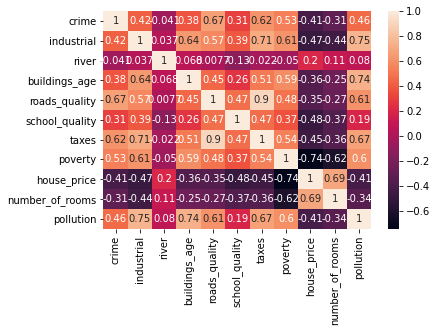

In [7]:
sns.heatmap(housing_data.corr(), annot=True)

# Spurious correlation in Observational data


The Pearson correlation between `crime` and `road_quality` is high:

In [8]:
housing_data['crime'].corr(housing_data['roads_quality'], method='pearson')

0.6666356998752914

However, this is likely a spurious correlation; It's unlikely that people are being directly driven to crime because of bad roads: Rather, it is poverty that results in more crime:

In [9]:
housing_data['crime'].corr(housing_data['poverty'], method='pearson')

0.5320774845476307

And it is also poverty that causes less investment in road infrastructure:

In [10]:
housing_data['poverty'].corr(housing_data['roads_quality'], method='pearson')

0.4845683859432826